In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np

from mne import create_info
from mne.viz import plot_topomap

from itertools import combinations

In [3]:
def generate_timepoints(total_recording_time, epoch_length, overlap):
    overlap_length = epoch_length * overlap

    start = 0
    timepoints = []
    while start + epoch_length < total_recording_time:
        timepoints.append((start, start + epoch_length))
        start += epoch_length - overlap_length

    return timepoints

def find_min_max(data):
    
    range_list = []
    for key, value in data.items():
        # print(key)
        # print(type(value))
        # print(np.min(value))
        range_list.append((np.min(value), np.max(value)))
        
    min_val = min([interval[0] for interval in range_list])
    max_val = max([interval[1] for interval in range_list])
    
    return min_val, max_val


def calculate_difference(data):
    diff_dict = {}
    keys = list(data.keys())
    comb_keys = combinations(keys, 2)
    print(keys)
    
    for comb in comb_keys:
        diff_dict[f"{comb[0]}_{comb[1]}"] = data[comb[0]] - data[comb[1]]
        
    return diff_dict


# Main function to draw the topomap
def draw_topomap(data, info, vlim):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    states = ['pre', 'during', 'post']
    titles = ['Pre State', 'During State', 'Post State']

    for i, state in enumerate(states):
        plot_topomap(data=data[state].mean(axis=0), pos=info, sensors=True, show=False, ch_type='eeg', size=3, axes=axs[i], vlim=vlim)
        axs[i].set_title(titles[i])
        # axs[i].set_xlabel('X Label')
        # axs[i].set_ylabel('Y Label')
        plt.colorbar(axs[i].images[-1], ax=axs[i])
    
    plt.tight_layout()
    plt.show()

def draw_topomap_difference(data, info, vlim):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    # min_val, max_val = find_min_max(data)
    
    states = ['pre_during', 'during_post', 'pre_post']
    titles = ['Pre-During State', 'During-Post State', 'Pre-Post State']

    for i, state in enumerate(states):
        plot_topomap(data=data[state].mean(axis=0), pos=info, sensors=True, show=False, ch_type='eeg', size=3, axes=axs[i], vlim=vlim)
        axs[i].set_title(titles[i])
        # axs[i].set_xlabel('X Label')
        # axs[i].set_ylabel('Y Label')
        plt.colorbar(axs[i].images[-1], ax=axs[i])
    
    plt.tight_layout()
    plt.show()

In [21]:
# read a pickle file
with open('/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/hjorth_complexity.pkl', 'rb') as f:
    complexity = pickle.load(f)

print(f"{complexity.keys() = }")

for key in complexity.keys():
    print(key, complexity[key].shape)
    break

intervals = find_min_max(complexity)
print(intervals)

complexity_difference = calculate_difference(complexity)
diff_intervals = find_min_max(complexity_difference)

print(f"{complexity_difference.keys()}")
print(f"{diff_intervals = }")


total_recording_time = 252
epoch_length = 9
overlap = 0.0
timepoints = generate_timepoints(total_recording_time, epoch_length, overlap)
x = [timepoints[i][0] for i in range(len(timepoints))]

print(len(timepoints))

# load metadata from the file
metadata = pd.read_csv('/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/new_metadata.csv')
ch_names = eval(metadata['channels'][0])

# create a list from a string

print(type(ch_names))
print(ch_names)

sfreq = 500
info = create_info(ch_names, sfreq, ch_types='eeg')
info.set_montage('standard_1020')

complexity.keys() = dict_keys(['pre', 'during', 'post'])
pre (27, 49)
(1.9011871640146953, 5.214144547488174)
['pre', 'during', 'post']
dict_keys(['pre_during', 'pre_post', 'during_post'])
diff_intervals = (-2.873229053900113, 2.3281876197958007)
27
<class 'list'>
['AF3', 'AF4', 'C1', 'C2', 'C3', 'C4', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC6', 'FCz', 'Fp1', 'Fp2', 'Fpz', 'O1', 'O2', 'Oz', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T8', 'TP7', 'TP8']


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,52 points
Good channels,49 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [17]:
len(complexity["pre"][0]), len(complexity["during"]), len(complexity["post"]), 

(49, 27, 27)

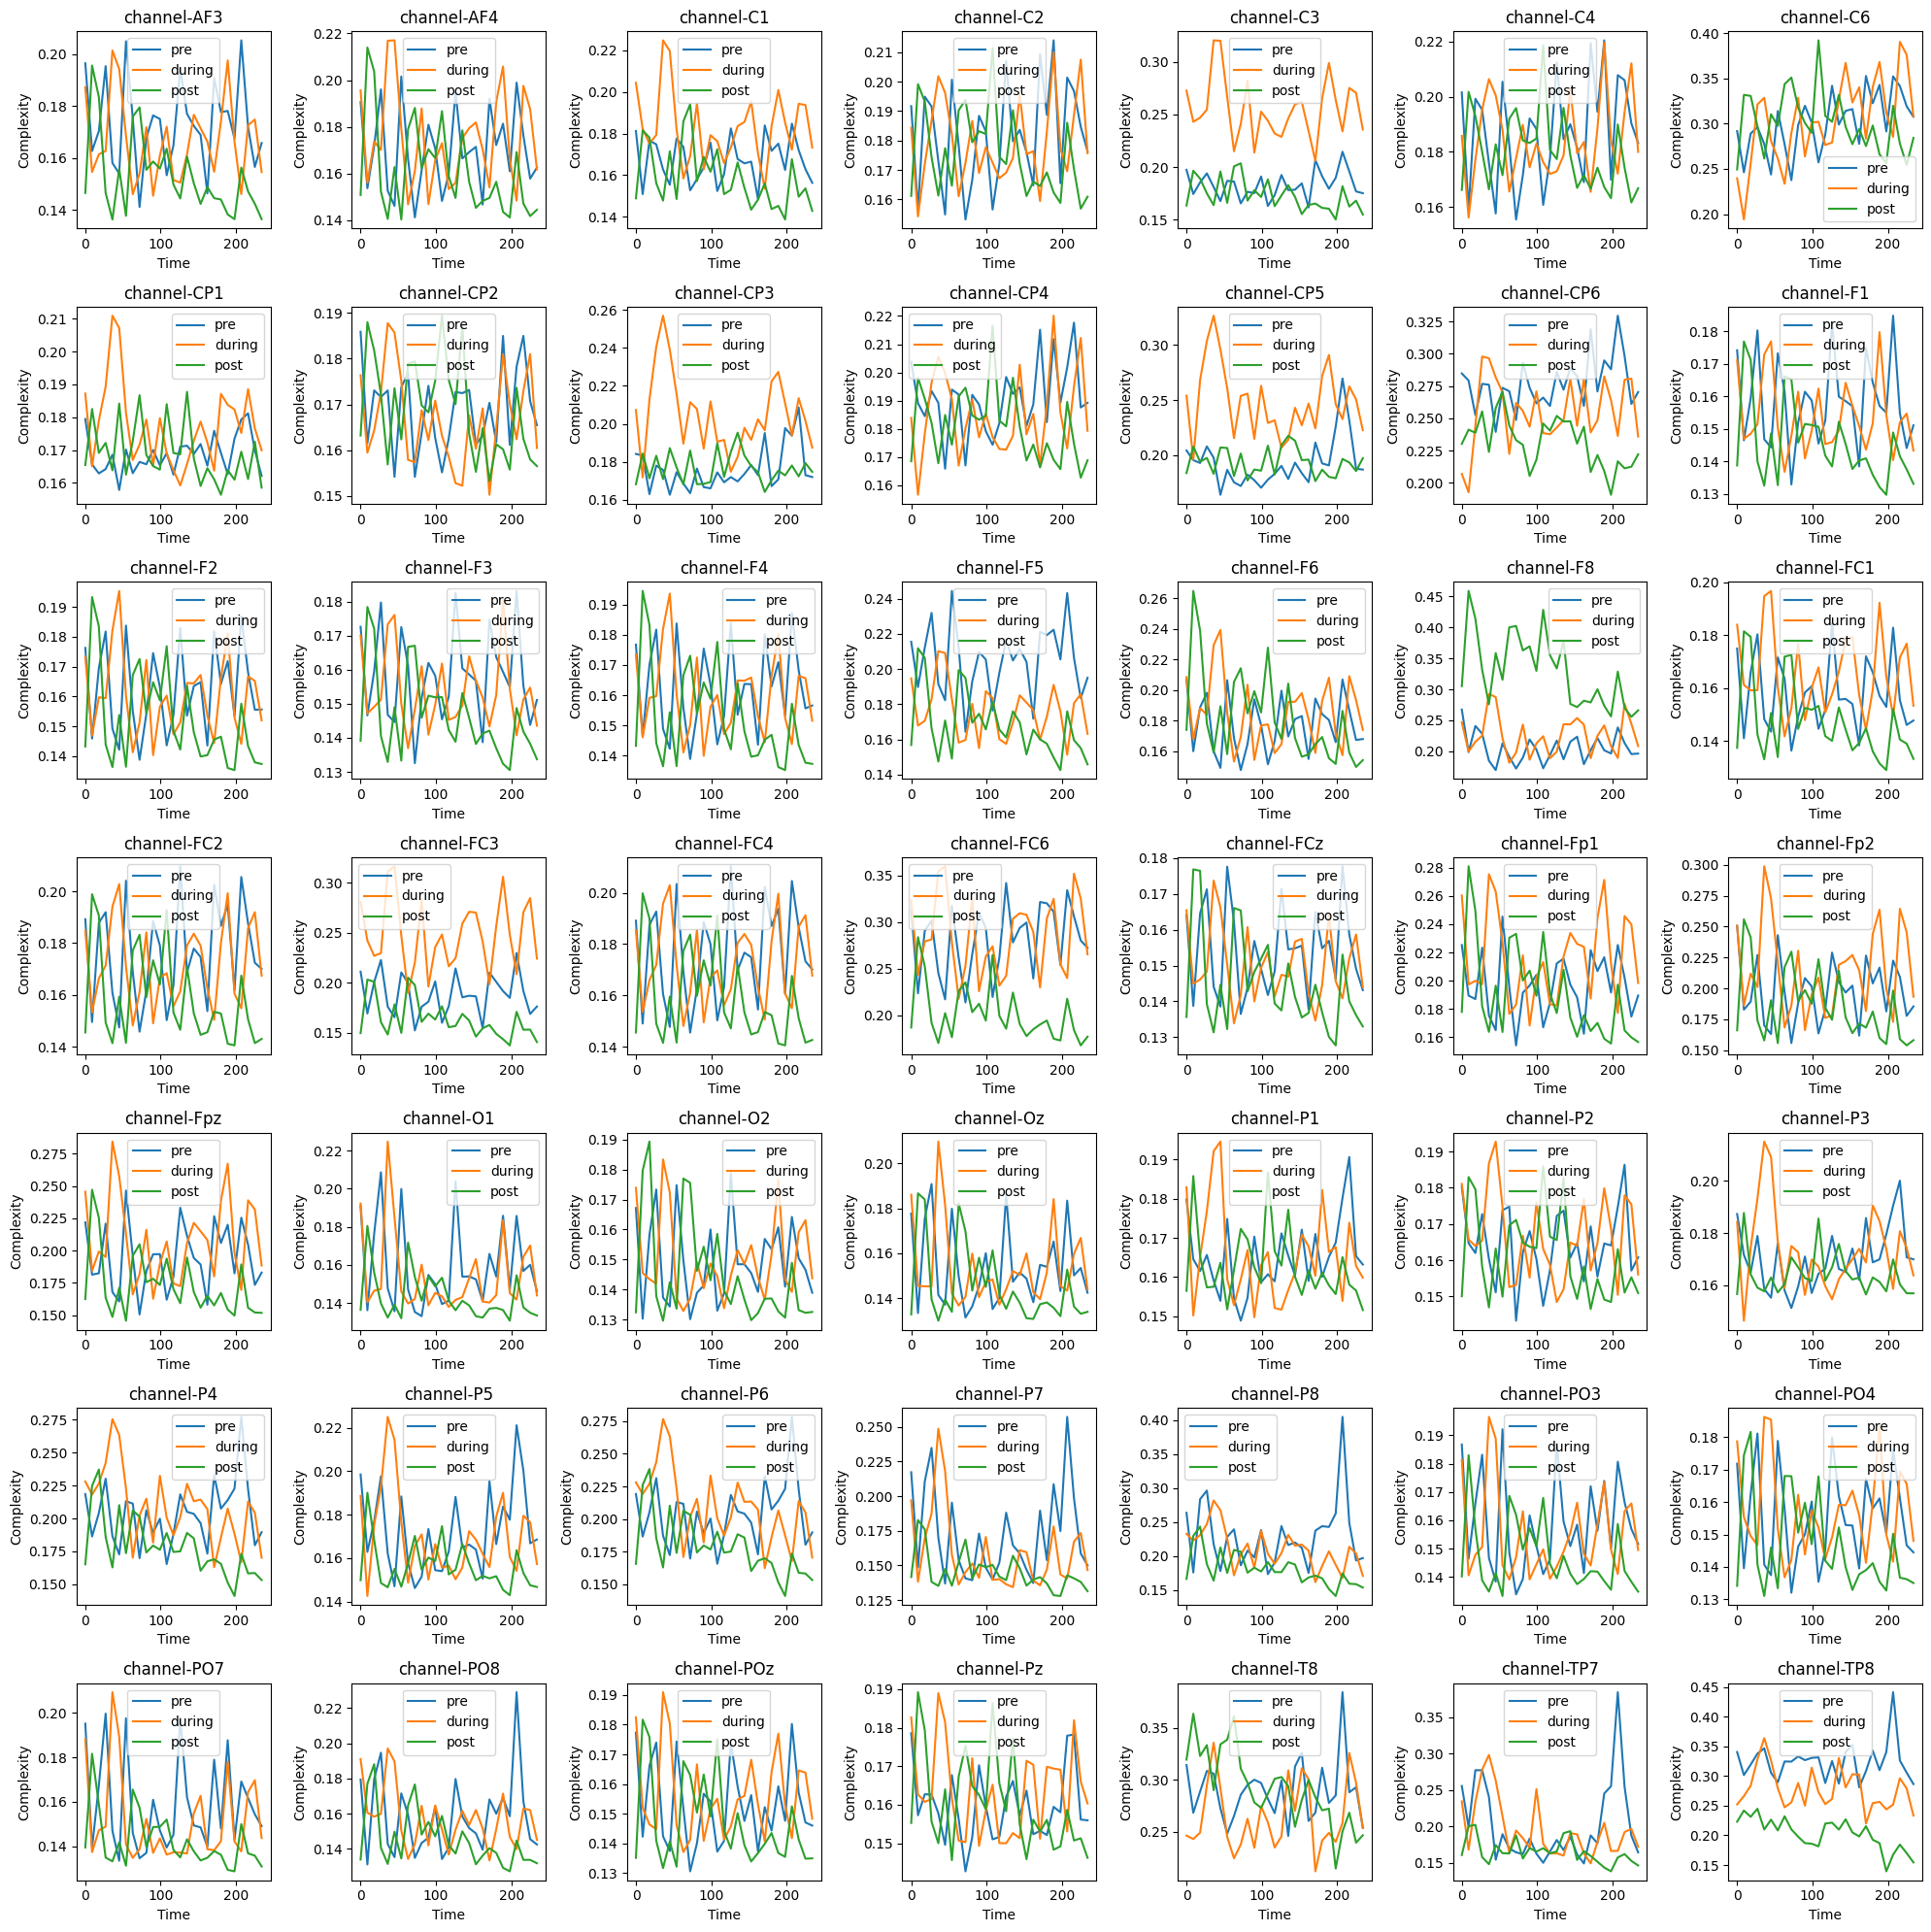

In [18]:
def draw_plot(data, x, channel_id, title, ax):
    ax.plot(x, data['pre'][:, channel_id])
    ax.plot(x, data['during'][:, channel_id])
    ax.plot(x, data['post'][:, channel_id])
    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_ylabel('Complexity')
    ax.legend(['pre', 'during', 'post'])


# Create a 7x7 subplot grid
fig, axs = plt.subplots(7, 7, figsize=(20, 20))

# Fill each subplot with topomaps or any other plots as needed
for i in range(7):
    for j in range(7):
        if i * 7 + j <= len(complexity["pre"][0]):
            idx = i * 7 + j
            # print(idx)
            draw_plot(complexity, x, idx, f"channel-{ch_names[idx]}", axs[i, j])
        # else:
        #     axs[i, j].axis('off')  # Hide empty subplots

plt.tight_layout()
plt.show()

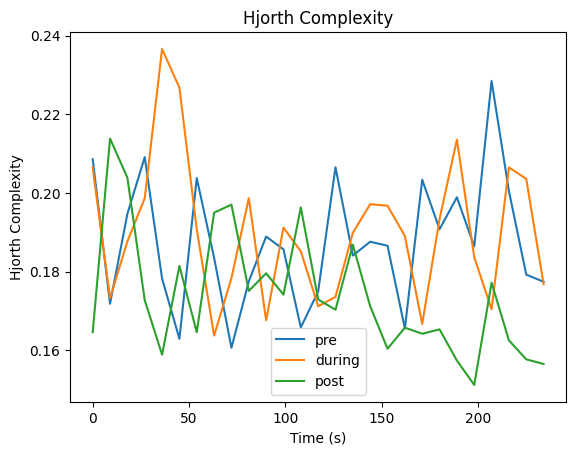

In [19]:
# plot the average over channels for each timepoint
plt.figure()
plt.plot(x, complexity['pre'].mean(axis=1))
plt.plot(x, complexity['during'].mean(axis=1))
plt.plot(x, complexity['post'].mean(axis=1))
plt.legend(['pre', 'during', 'post'])
plt.title('Hjorth Complexity')
plt.xlabel('Time (s)')
plt.ylabel('Hjorth Complexity')
plt.show()


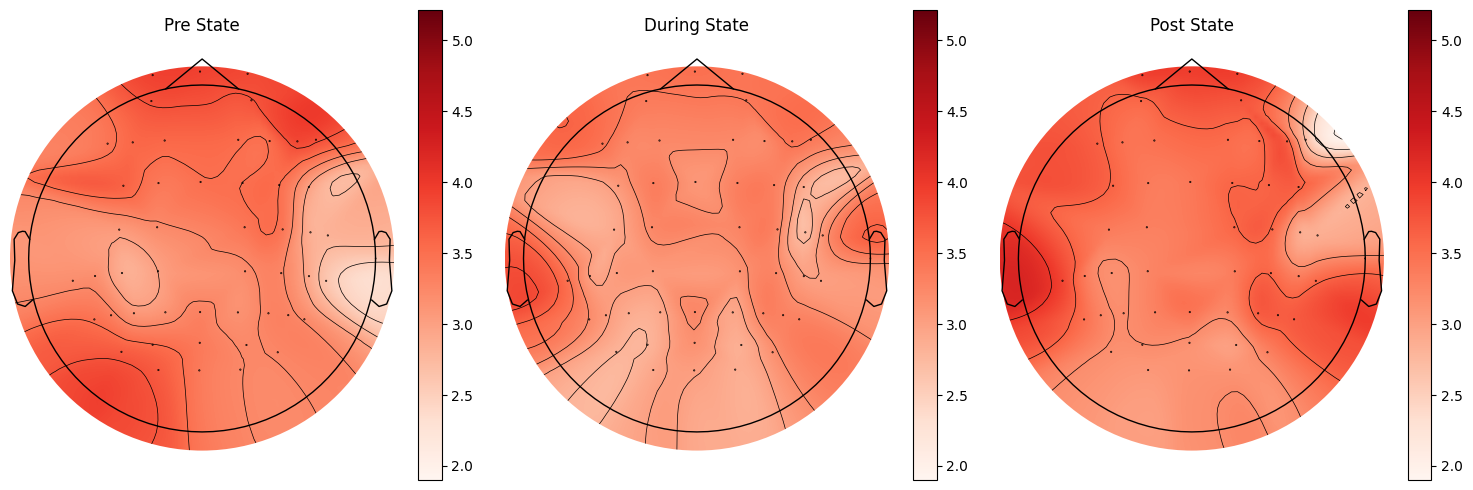

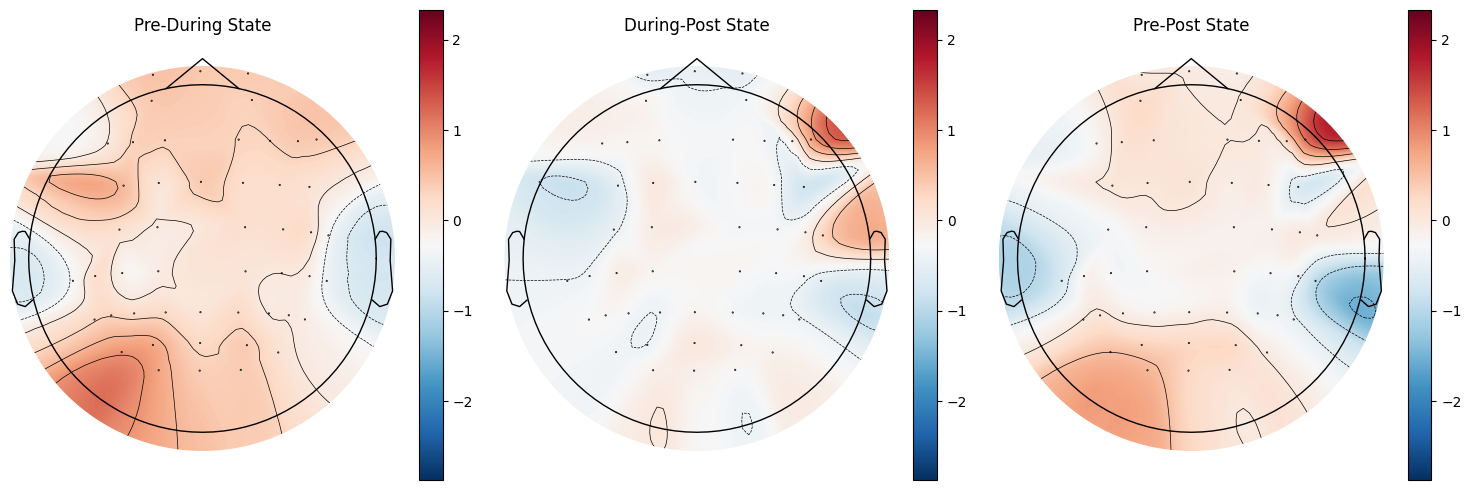

In [25]:
draw_topomap(complexity, info, intervals)
draw_topomap_difference(complexity_difference, info, diff_intervals)

In [ ]:
total_trials = len(x)


for i in range(total_trials):
    
    temp_dict = {}
    # print(f"Trial {i + 1}")
    
    for key in complexity.keys():
        # print(f"{key} = {complexity[key][i].shape}")
        temp_dict[key] = complexity[key][i].reshape(1, -1)
    
    draw_topomap(temp_dict, info, intervals)

In [ ]:
total_trials = len(x)


for i in range(total_trials):
    
    temp_dict = {}
    # print(f"Trial {i + 1}")
    
    for key in complexity_difference.keys():
        # print(f"{key} = {complexity[key][i].shape}")
        temp_dict[key] = complexity_difference[key][i].reshape(1, -1)
    
    draw_topomap_difference(temp_dict, info, diff_intervals)

In [ ]:
# Create a 7x7 subplot grid

def draw_topomap_difference(data, info, vlim):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    # min_val, max_val = find_min_max(data)
    
    states = ['pre_during', 'during_post', 'pre_post']
    titles = ['Pre-During State', 'During-Post State', 'Pre-Post State']

    for i, state in enumerate(states):
        plot_topomap(data=data[state].mean(axis=0), pos=info, sensors=True, show=False, ch_type='eeg', size=3, axes=axs[i], vlim=vlim)
        axs[i].set_title(titles[i])
        # axs[i].set_xlabel('X Label')
        # axs[i].set_ylabel('Y Label')
        plt.colorbar(axs[i].images[-1], ax=axs[i])
    
    plt.tight_layout()
    plt.show()

times = len(complexity_difference["pre_post"])
fig, axs = plt.subplots(times, 3, figsize=(20, 20))

# Fill each subplot with topomaps or any other plots as needed
for i in range(times):
    for j, key in enumerate(complexity_difference.keys()):
        if i * 7 + j <= len(complexity_difference["pre_post"]):
            idx = i * 7 + j
            draw_plot(complexity, x, idx, f"channel-{ch_names[idx]}", axs[i, j])
        else:
            axs[i, j].axis('off')  # Hide empty subplots

plt.tight_layout()
plt.show()